In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt

In [2]:
bc = datasets.load_breast_cancer() # Breast Cancer Dataset

In [3]:
bc.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
bc.target_names # Label Name

array(['malignant', 'benign'], dtype='<U9')

In [5]:
bc.data # Input Data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [6]:
bc.feature_names # Features

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [7]:
X, y = bc.data, bc.target # Dataset

In [8]:
X.shape, y.shape

((569, 30), (569,))

In [45]:
class LogisticRegression():
    def __init__(self,lr,n_iters):
        self.lr = lr
        self.n_iters = n_iters
    
    # Sigmoid function
    def sigmoid(self,z):
        return 1/(1+np.exp(-z))
    
    # Cost Function
    def cost_function(self,y,y_pred,n_samples):
        return (1/n_samples) * np.sum((y * np.log(y_pred)) + ((1 - y) * np.log(( 1 - y_pred))))
    
    # Train
    def fit(self,X,y):
        n_samples, n_features = X.shape
        
        # Initialize weights
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        # J = np.empty(self.n_iters)
        
        for i in range(self.n_iters):
            z = np.dot(X,self.weights) + self.bias
            y_pred = self.sigmoid(z)
            
            # Cost Function
            # J[i] = self.cost_function(y,y_pred,n_samples)
            
            # Backpropagation
            dw = (1/n_samples) * np.dot(X.T,(y_pred - y))
            db = (1/n_samples) * np.sum(y_pred - y)
            
            # Update Weights
            self.weights -= self.lr * dw
            self.bias -= self.lr * db
    
    # Prediction
    def predict(self,X):
        z = np.dot(X,self.weights) + self.bias
        y_pred = self.sigmoid(z)
        y_pred_cls = [1 if i > 0.5 else 0 for i in y_pred]
        return np.array(y_pred_cls)

In [46]:
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=1234
    )

In [47]:
regressor = LogisticRegression(lr=0.0001, n_iters=1000)
regressor.fit(X_train, y_train)

In [48]:
y_pred = regressor.predict(X_test)

In [49]:
y_pred[:10]

array([1, 1, 1, 1, 1, 1, 0, 1, 0, 0])

In [50]:
y_test[:10]

array([1, 1, 1, 1, 1, 1, 0, 1, 0, 0])

In [51]:
# Accuracy Score
def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

In [52]:
accuracy(y_test,y_pred)

0.9298245614035088

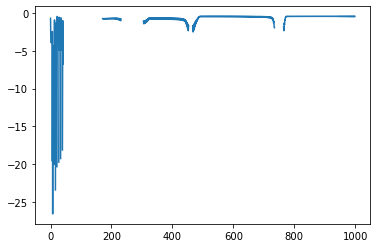

In [44]:
# Plot Cost Function Curve
plt.plot(J)
plt.show()